# Integrate All ten datasets in one Visualization (~500k cells)

### Import modules, set paths, load files:

In [1]:
# !pip install scanpy
# !pip install ipywidgets
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import os

from tqdm import tqdm

In [2]:
# !pip install scarches
# !pip install -U pandas==2.0

import scarches as sca

 captum (see https://github.com/pytorch/captum).


In [3]:
# https://github.com/huggingface/transformers/issues/29763
# pip install transformers==4.37.2
import torch

## Import the cell type information from the CSV file

And also normalized the data

In [6]:
def import_cell_type(filename_csv, filename_h5ad):
    df_adata = pd.read_csv(filename_csv, index_col=0)
    path_input_data = filename_h5ad
    reference_adata = sc.read(path_input_data)

    list_cells = reference_adata.obs.index.tolist()
    list_cell_types = []

    error_counts = 0
    error_label = 'ERROR'

    for i in tqdm(range(len(list_cells))):
        index_example = list_cells[i]
        try:
            cell_type_example = df_adata.loc[index_example, 'CL_Label']
            list_cell_types.append(cell_type_example)
        except:
            error_counts += 1
            list_cell_types.append(error_label)

    print('Error count is:', error_counts)
    # list_cell_types
    print('Error percentage is:', error_counts*100/len(list_cells),'%')

    reference_adata.obs["CL_label"] = list_cell_types

    # choose layers

    reference_adata.X = reference_adata.layers["spliced_unspliced_sum"]

    return reference_adata

In [7]:
filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_853-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_853.h5ad'
reference_adata_1 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_986-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_986.h5ad'
reference_adata_2 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_369-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_369.h5ad'
reference_adata_3 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_282-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_282.h5ad'
reference_adata_4 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_672-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_672.h5ad'
reference_adata_5 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_258-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_258.h5ad'
reference_adata_6 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_633-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_633.h5ad'
reference_adata_7 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_384-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_384.h5ad'
reference_adata_8 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_643-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_643.h5ad'
reference_adata_9 = import_cell_type(filename_csv, filename_h5ad)

filename_csv = '/home/fanhuan/data/BioInfo/453k/expr_967-annotations.csv'
filename_h5ad = '/home/fanhuan/data/BioInfo/453k/expr_967.h5ad'
reference_adata_10 = import_cell_type(filename_csv, filename_h5ad)

100%|███████████████████████| 100921/100921 [00:00<00:00, 169616.75it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|███████████████████████| 100984/100984 [00:00<00:00, 169086.29it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|███████████████████████| 100957/100957 [00:00<00:00, 168598.21it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|█████████████████████████| 11236/11236 [00:00<00:00, 168740.51it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|███████████████████████████| 8688/8688 [00:00<00:00, 171794.14it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|███████████████████████████| 4899/4899 [00:00<00:00, 157455.14it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|███████████████████████████| 8201/8201 [00:00<00:00, 170162.44it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|███████████████████████████| 8430/8430 [00:00<00:00, 162351.21it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|███████████████████████| 100955/100955 [00:00<00:00, 167426.48it/s]


Error count is: 0
Error percentage is: 0.0 %


100%|███████████████████████████| 7980/7980 [00:00<00:00, 168742.32it/s]

Error count is: 0
Error percentage is: 0.0 %


In [9]:
ann_data_list = [reference_adata_1, reference_adata_2, reference_adata_3, reference_adata_4
                              , reference_adata_5, reference_adata_6, reference_adata_7, reference_adata_8
                              , reference_adata_9, reference_adata_10]
# ann_data_list

In [10]:
combined_ann_data = ann_data_list[0].concatenate(ann_data_list[1:])

In [11]:
sc.pp.filter_cells(combined_ann_data, min_genes=200)
sc.pp.filter_genes(combined_ann_data, min_cells=3)
sc.pp.normalize_total(combined_ann_data, target_sum=1e4)
sc.pp.log1p(combined_ann_data)
sc.pp.highly_variable_genes(combined_ann_data, n_top_genes=2000)

In [12]:
adata_concat = combined_ann_data
adata_concat

AnnData object with n_obs × n_vars = 259531 × 53221
    obs: 'CL_label', 'batch', 'n_genes'
    var: 'hugo_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'

In [13]:
print(np.sum(adata_concat.X,axis=0))
print(np.sum(adata_concat.X,axis=1))

[[2.65e+03 9.05e+02 1.20e+04 1.25e+04 1.71e+04 2.26e+04 2.29e+04 ...
  2.93e+04 1.35e+02 5.56e+03 1.41e+02 3.80e+04 8.05e+00 3.77e+02]]
[[1001.3 ]
 [1289.51]
 [1509.87]
 [1972.16]
 [1559.38]
 [1128.62]
 [ 748.27]
 ...
 [2850.81]
 [4004.97]
 [3145.47]
 [2731.7 ]
 [ 965.66]
 [1427.5 ]
 [3289.64]]


In [14]:
sc.pp.neighbors(adata_concat)
sc.tl.umap(adata_concat)

         Falling back to preprocessing with `sc.pp.pca` and default params.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


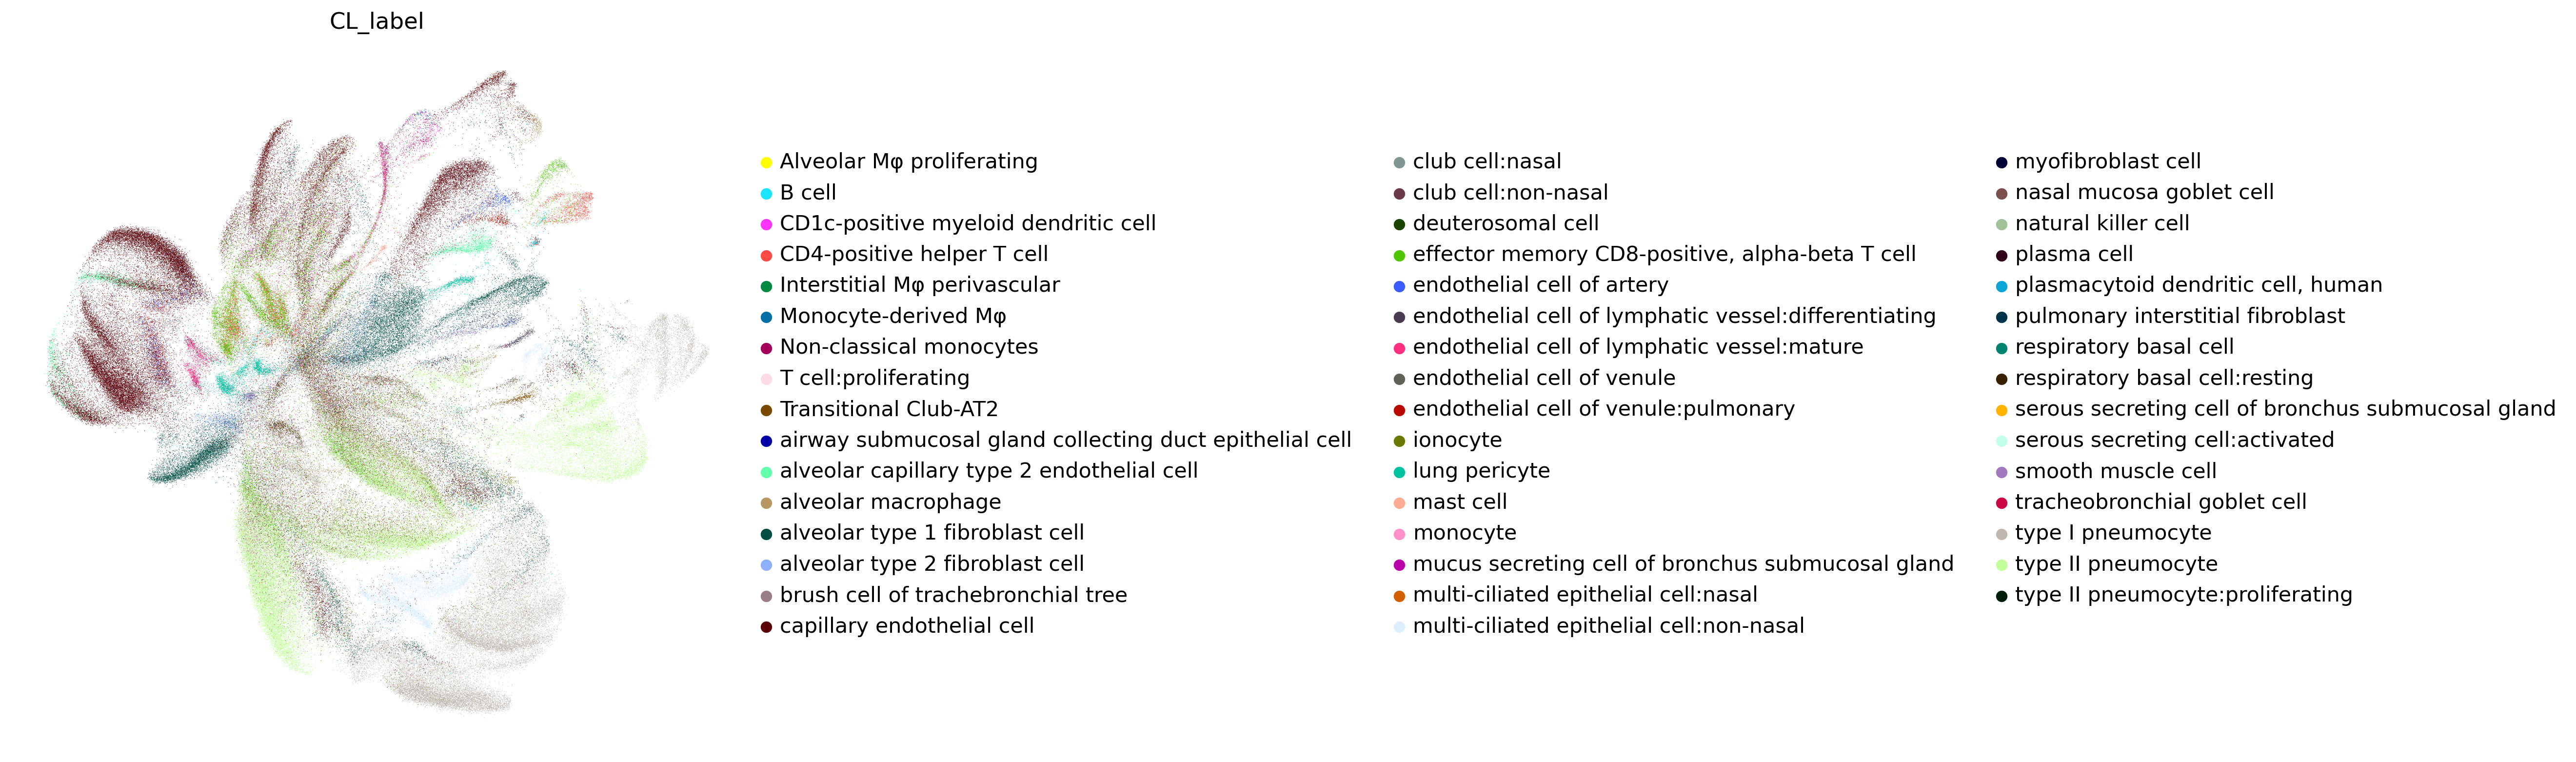

In [15]:
sc.pl.umap(adata_concat, color=['CL_label'], wspace=0.5, frameon=False)

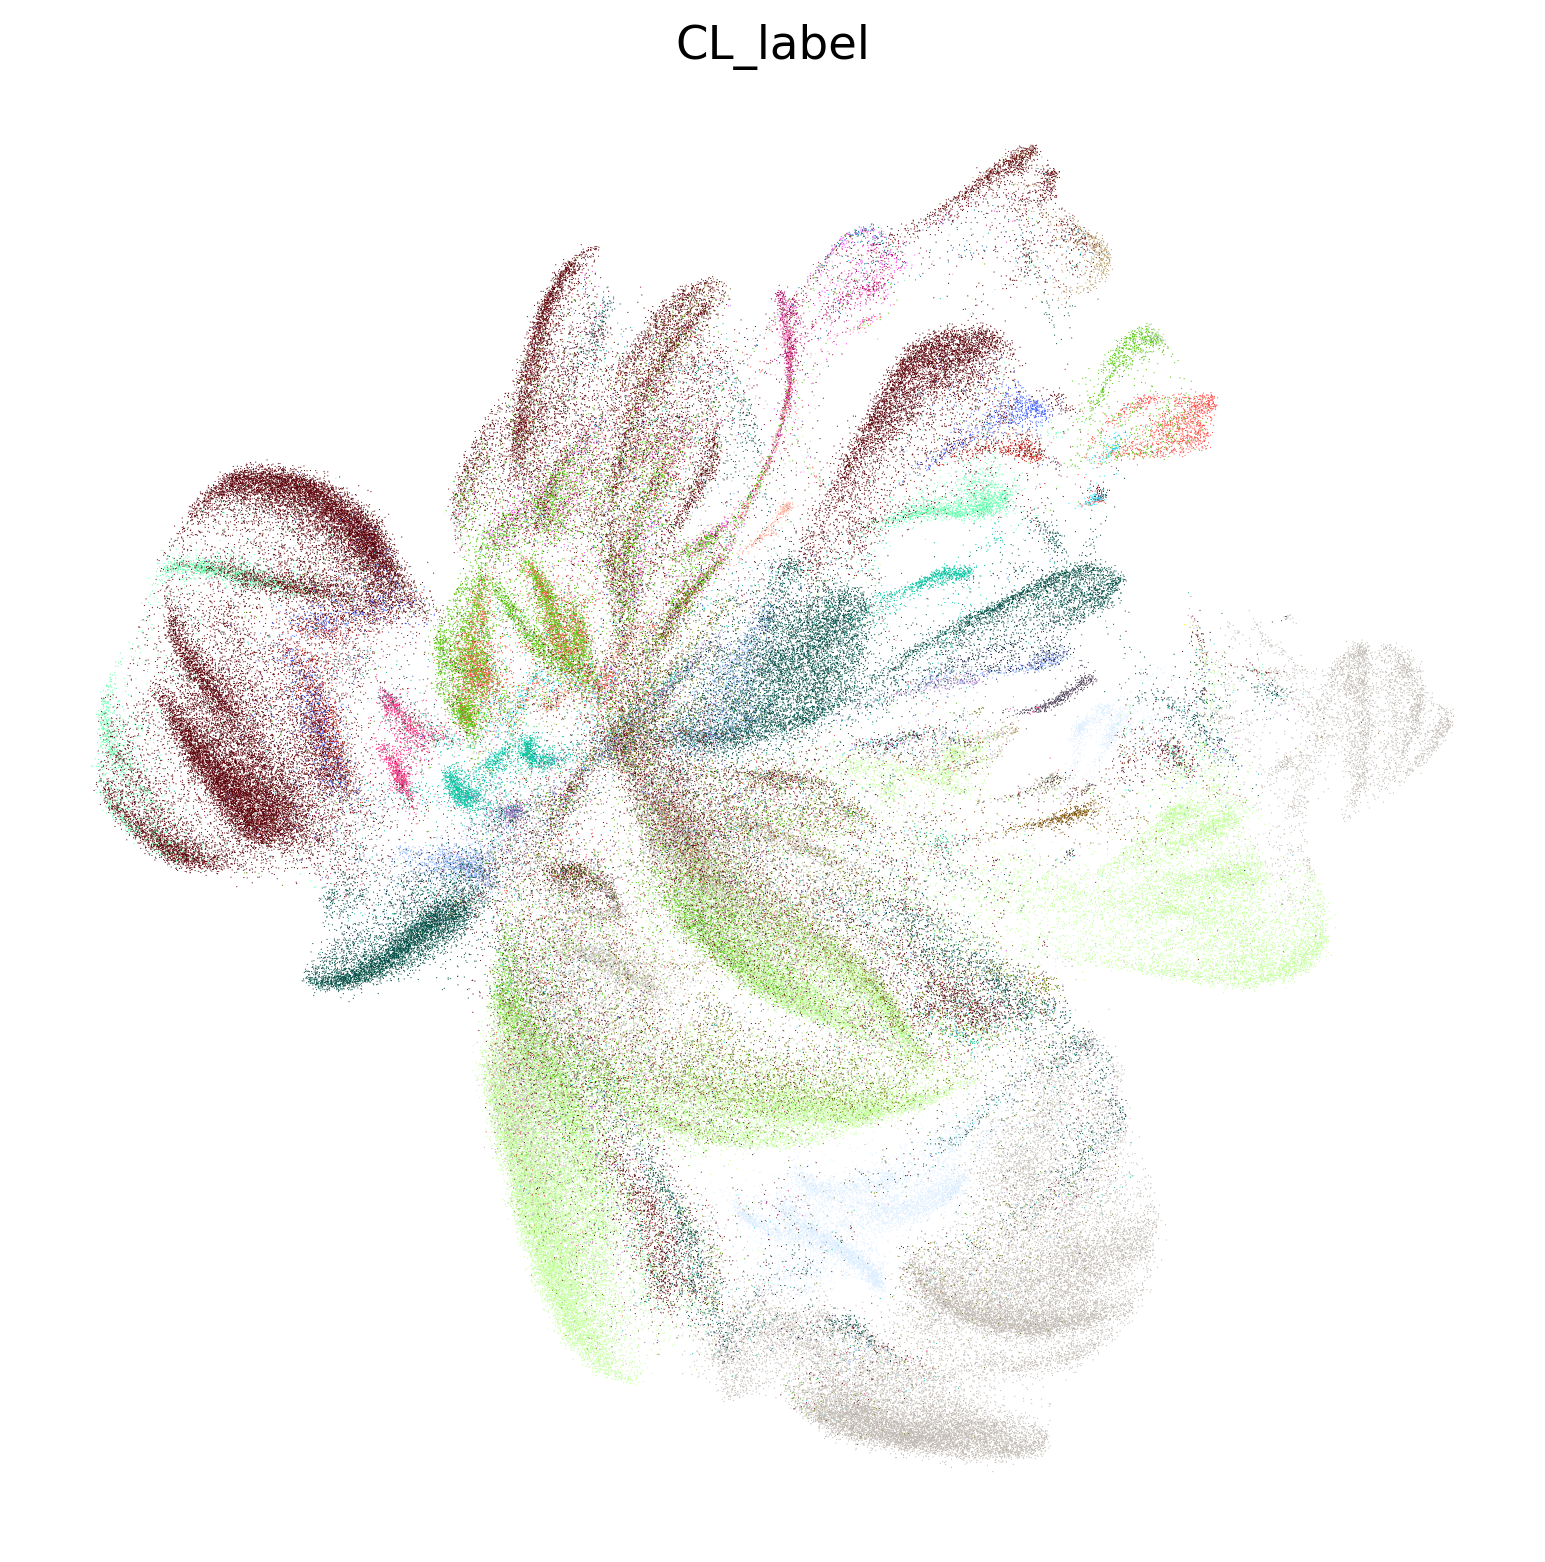

In [16]:
sc.pl.umap(adata_concat, color=['CL_label'], frameon=False, legend_loc = 'best')

print('cell type number is:', len(adata_concat.obs['CL_label'].value_counts()))
adata_concat.obs['CL_label'].value_counts()

# Error Analysis

In [17]:
# Save the anndata
adata_concat.write_h5ad(
    '/home/fanhuan/data/BioInfo/453k/all-with_annotation-umap-normal_preprocess_post.h5ad'
)

In [18]:
adata_sample = sc.pp.subsample(adata_concat, fraction = 0.05, random_state = 42, copy = True)
adata_sample

AnnData object with n_obs × n_vars = 12976 × 53221
    obs: 'CL_label', 'batch', 'n_genes'
    var: 'hugo_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'CL_label_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'spliced_unspliced_sum', 'unspliced'
    obsp: 'distances', 'connectivities'

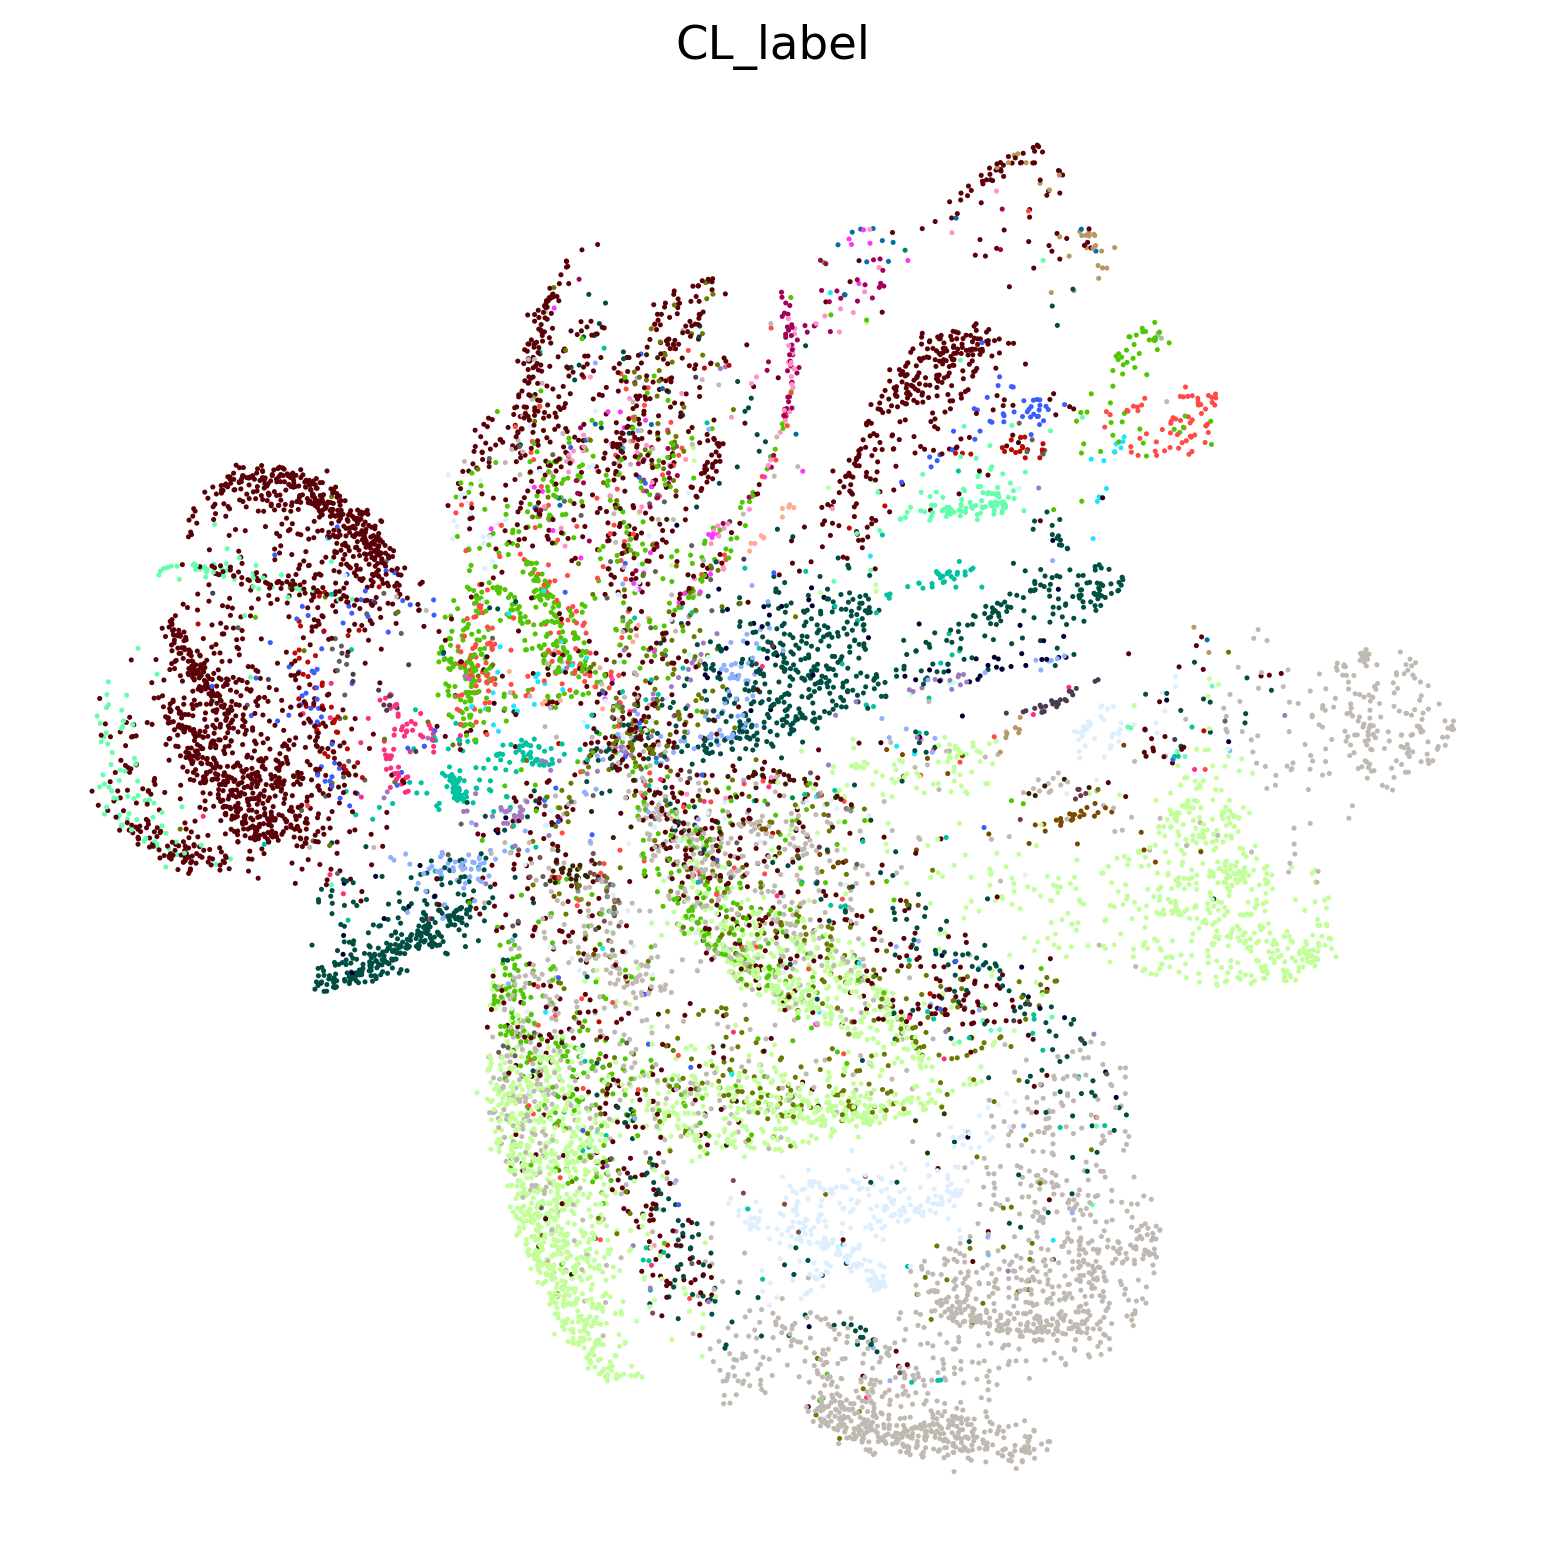

In [19]:
sc.pl.embedding(adata_sample, basis='X_umap', color=['CL_label'], frameon=False, legend_loc = 'best')

/home/fanhuan/anaconda3/envs/sos/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


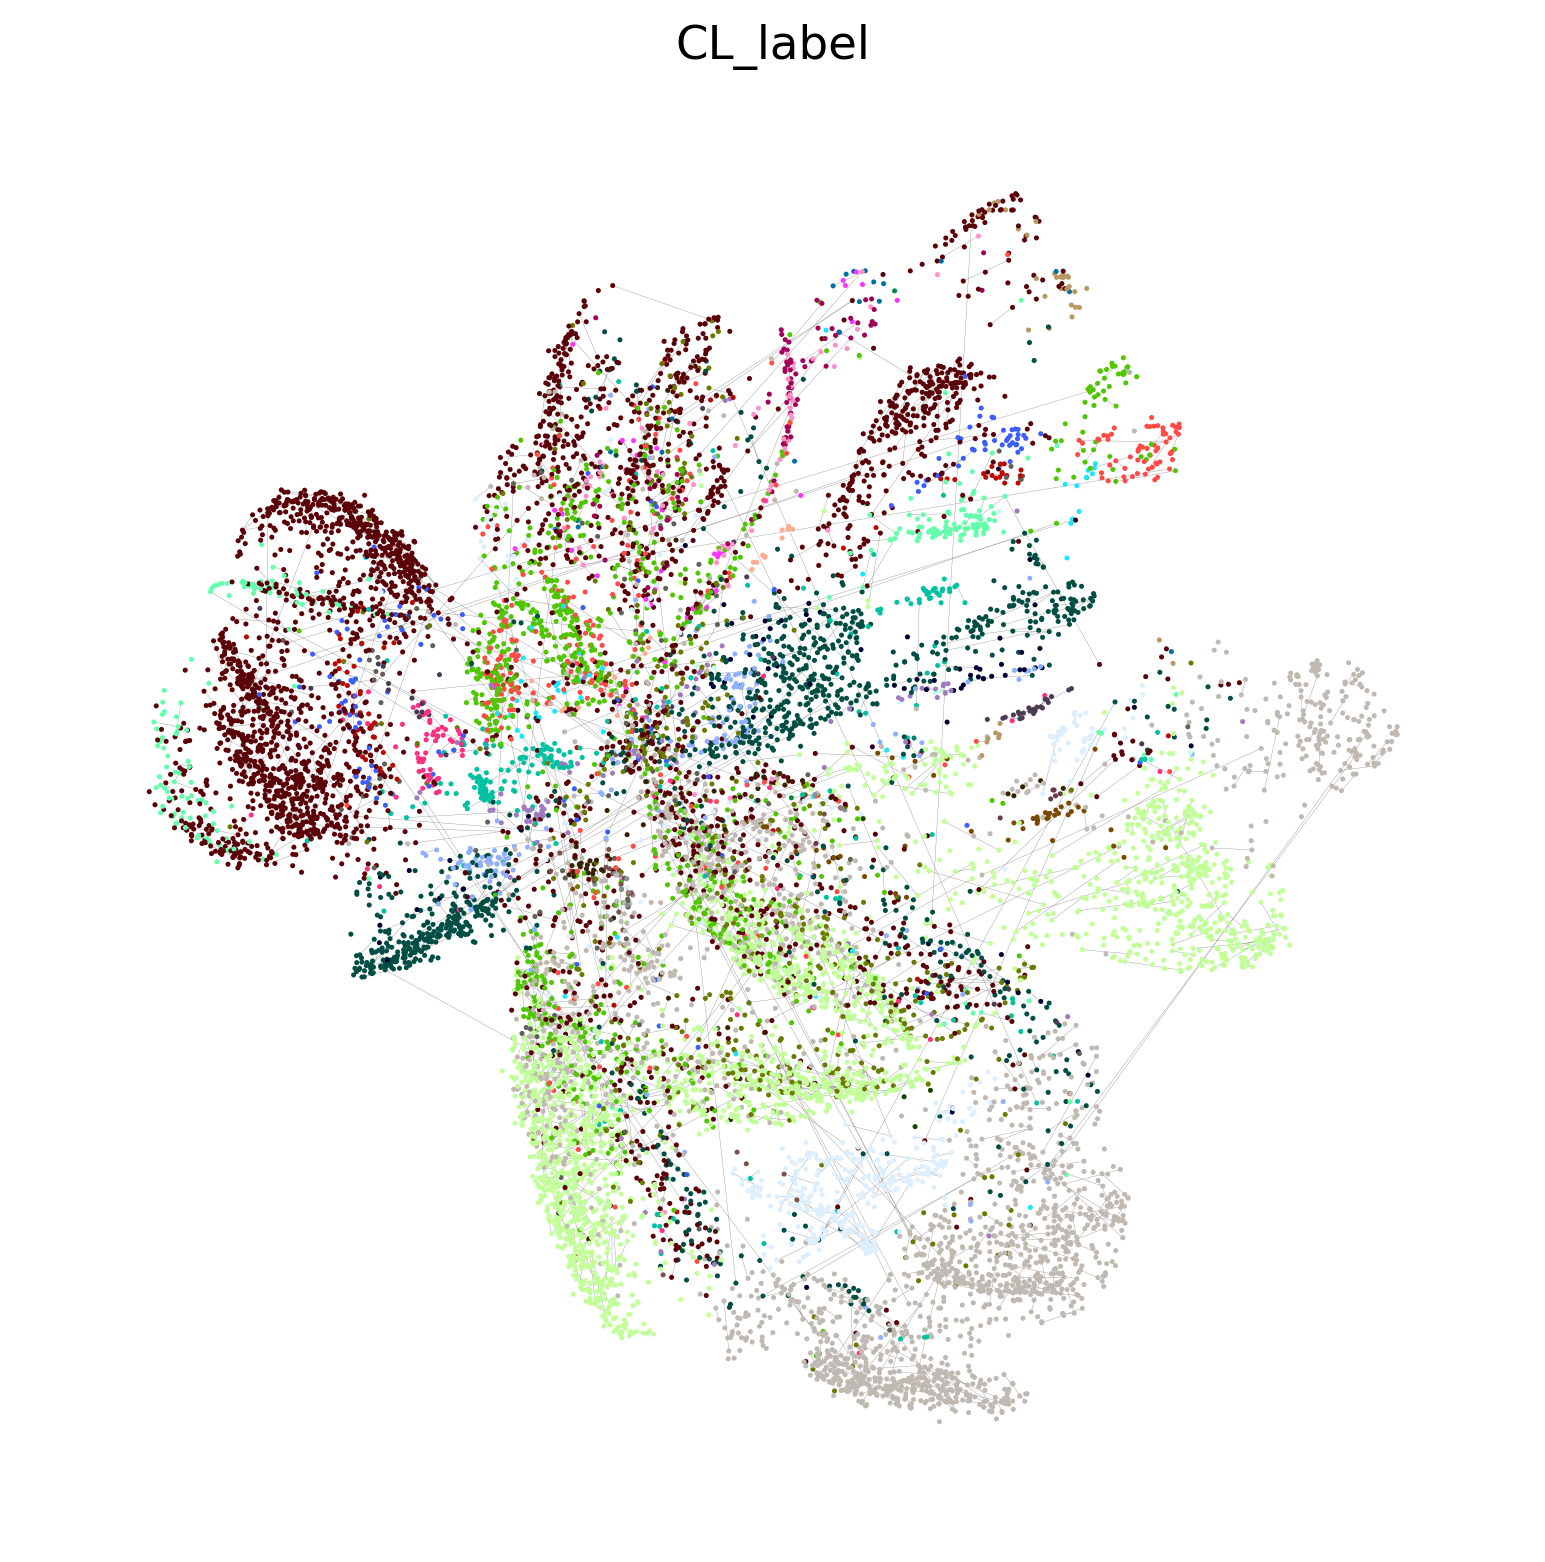

In [20]:
sc.pp.neighbors(adata_sample, 1, metric='cosine')
sc.pl.embedding(adata_sample, basis='X_umap', color=['CL_label'], frameon=False, legend_loc = 'best', edges=True)